In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imutils

In [2]:
img=cv2.imread('image.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


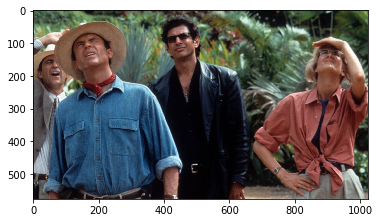

In [3]:
plt.imshow(img)

In [32]:
img.shape ## height,weight,depth

(576, 1024, 3)

In [47]:
h,w,d=img.shape

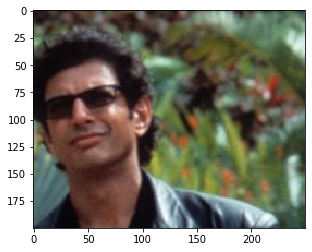

In [41]:
roi = img[0:200, 400:650] ## img[start y:end y , start x:end x]
plt.imshow(roi)

* Resize

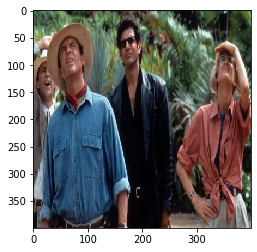

In [59]:
resize=cv2.resize(img,(400,400))   #(y,x)
plt.imshow(resize)

In Above we got sequed image, to get better image we calculate aspect ratio

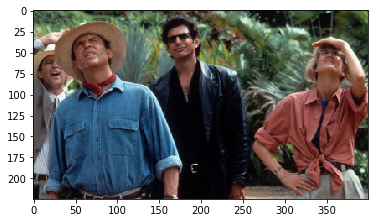

In [52]:
# this method is not perferable
r=400/w
dim=(400,int(h*r))
resize1=cv2.resize(img,dim)
plt.imshow(resize)

Every time calculating aspect ratio is difficult, so we imutils

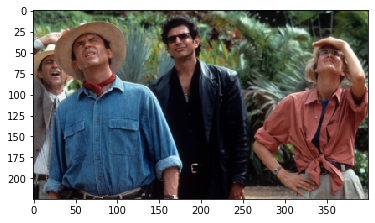

In [65]:
im=imutils.resize(img,width=400)  # give either width or height is enough
plt.imshow(im)

In [57]:
#Croping

import cv2
import numpy as np
img=cv2.imread('image.jpg')
cv2.imshow('original',img)
cv2.waitKey(0)

height,width=img.shape[:2]

start_row,start_col = int(height*0.25),int(width*0.25)
end_row,end_col=int(height*0.75),int(width*0.75)

cropped=img[start_row:end_row,start_col:end_col]

cv2.imshow('cropped',cropped)
cv2.waitKey(0)

cv2.destroyAllWindows()

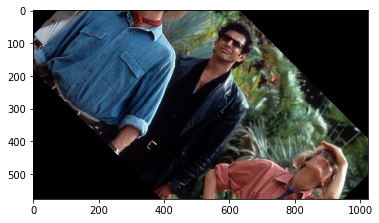

In [68]:
#not preferable
# we can't see full image
rotated = imutils.rotate(img, -45)
plt.imshow(rotated)

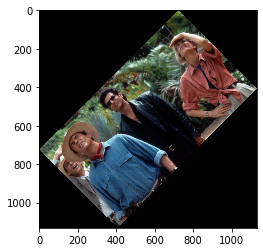

In [70]:
rotated1 = imutils.rotate_bound(img, -45)
plt.imshow(rotated1)

* Blur

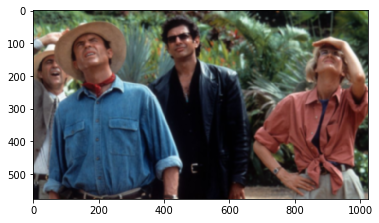

In [80]:

blur = cv2.GaussianBlur(img, (11, 11), 0) ######(image,Kernal size(large means more),
plt.imshow(blur)

* Draw Rectangle

* img : The destination image to draw upon. We’re drawing on output .
* pt1 : Our starting pixel coordinate which is the top-left. In our case, the top-left is (320, 60) .
* pt2 : The ending pixel — bottom-right. The bottom-right pixel is located at (420, 160) .
* color : BGR tuple. To represent red, I’ve supplied (0 , 0, 255) .
* thickness : Line thickness (a negative value will make a solid rectangle). I’ve supplied a thickness of 2

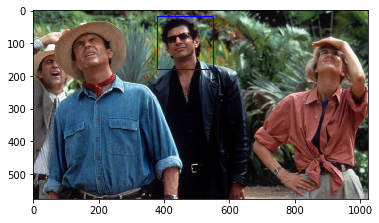

In [95]:
#cv2.rec(image,(x,y),(x,y),color,thickness)

rect=cv2.rectangle(img.copy(),(380,20),(550,180),(0, 0, 255), 2)
plt.imshow(rect)

* Cricle
* img : The output image.
* center : Our circle’s center coordinate. I supplied (300, 150)  which is right in front of Ellie’s eyes.
* radius : The circle radius in pixels. I provided a value of 20  pixels.
* color : Circle color. This time I went with blue as is denoted by 255 in the B and 0s in the G + R components of the BGR     * * tuple, (255, 0, 0) .
* thickness : The line thickness. Since I supplied a negative value (-1 ), the circle is solid/filled in

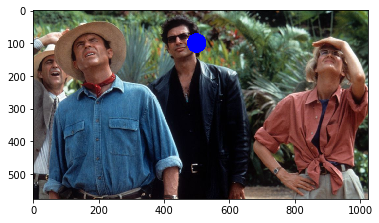

In [97]:
cri=cv2.circle(img.copy(),(500,100),30,(0,0,255),-1) # -1 means it will full inside cricle
plt.imshow(cri)                                     # 1 measn outside cricle

* Line


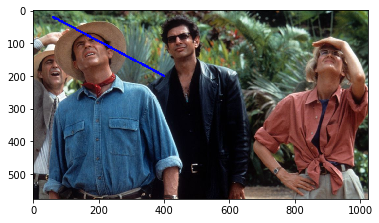

In [100]:
line=cv2.line(img.copy(),(60, 20), (400, 200), (0, 0, 255), 5)
plt.imshow(line)

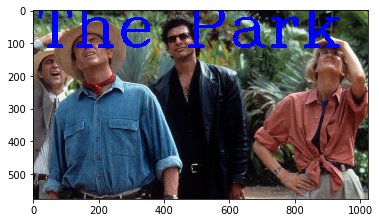

In [13]:
output=img.copy()

cv2.putText(output,'The Park',(10,110),cv2.FONT_HERSHEY_COMPLEX,6,(0,0,255),10)
plt.imshow(output)
# cv2.imshow('output',output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [58]:
block=cv2.imread('block.png')
gray=cv2.cvtColor(block,cv2.COLOR_BGR2GRAY)
# plt.imshow(block1,cmap='gray')
cv2.imshow('gray',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

* edge detection


In [59]:
edge = cv2.Canny(gray, 30, 150)
cv2.imshow('edge',edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

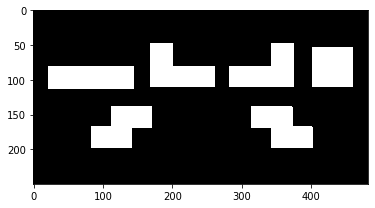

In [39]:
# https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/
ret,thresh = cv2.threshold(gray.copy(), 240,255 , cv2.THRESH_BINARY_INV)
plt.imshow(thresh,cmap='gray')

* Find Counter
* canny edge helps for better accuracy

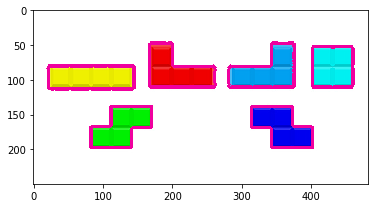

In [30]:
cnts = cv2.findContours(edge.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = block.copy()
# loop over the contours
for c in cnts:
# draw each contour on the output image with a 3px thick purple
# outline, then display the output contours one at a time
    plt.imshow(cv2.drawContours(output, [c], -1, (240, 0, 159), 3)) ## by using matplotlib
    cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
    cv2.imshow("Contours", output)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [34]:
temp=edge.copy()
counter,hierarcy = cv2.findContours(temp, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

#-1 signifies drawing all contours 
cv2.drawContours(block, counter, -1, (0, 255, 0), 3) 
  
cv2.imshow('Contours', block) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 


* Erosions and dilations

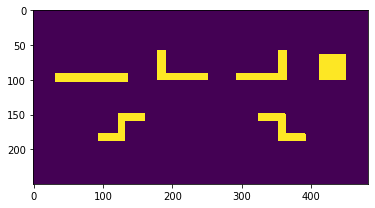

In [48]:
mask = thresh.copy()
plt.imshow(mask)

kernal=np.ones((5,5))
mask1 = cv2.erode(mask, kernal, iterations=5)
plt.imshow(mask1)

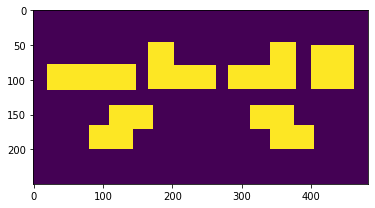

In [53]:
kernal=np.ones((5,5))
mask2 = cv2.dilate(mask, kernal, iterations=1)
plt.imshow(mask2)